In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree
from scipy.stats import randint

In [2]:
df1=pd.read_csv('encoded_data.csv')

In [3]:
x = df1.drop('Prediabetes Status', axis=1)
y = df1['Prediabetes Status']


smote = SMOTE(random_state=42)
x_amplified, y_amplified = smote.fit_resample(x, y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_amplified, y_amplified, test_size=0.2, random_state=42)

In [5]:

model = tree.DecisionTreeClassifier()

param_dist = {
    'max_depth': [3, 6, 8, 10, None],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 4),
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)


random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_

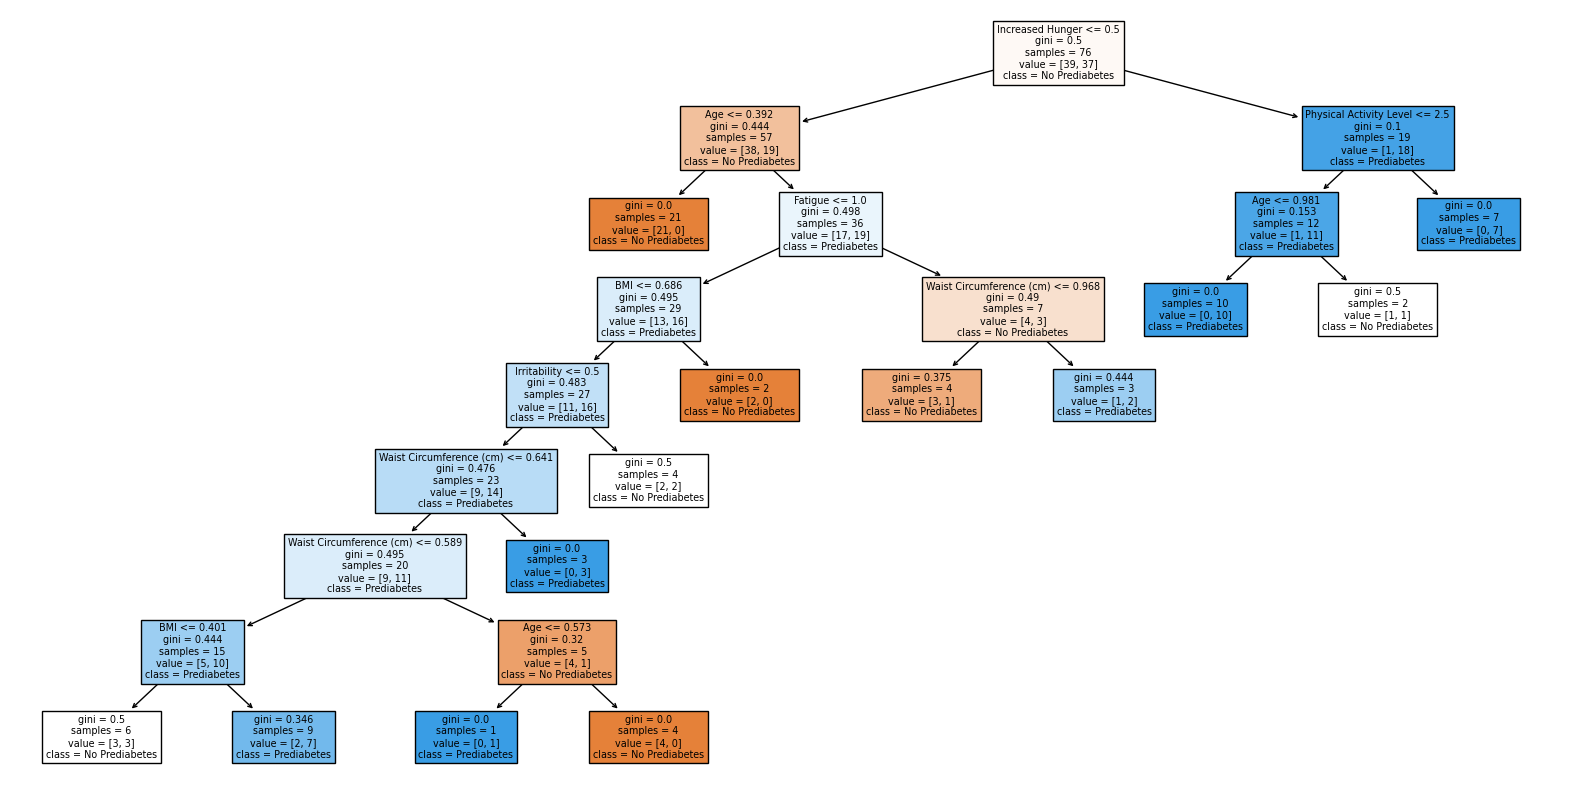

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(best_model, feature_names=x.columns, class_names=['No Prediabetes', 'Prediabetes'], filled=True)
plt.show()

In [7]:
# Make predictions on the training and test sets
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Precision, recall, and F1-score for training data
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1_score = f1_score(y_train, train_predictions)
train_accuracy = best_model.score(X_train, y_train)



# Precision, recall, and F1-score for test data
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)
test_accuracy = best_model.score(X_test, y_test)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, train_predictions)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Print evaluation metrics

print(f"Training Accuracy: {train_accuracy:.2f}")
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1_score)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nTest Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1_score)
print("\nConfusion Matrix for Training Data:")
print(train_conf_matrix)
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)

Training Accuracy: 0.87
Training Precision: 0.9090909090909091
Training Recall: 0.8108108108108109
Training F1-score: 0.8571428571428571
Test Accuracy: 0.70

Test Precision: 1.0
Test Recall: 0.45454545454545453
Test F1-score: 0.625

Confusion Matrix for Training Data:
[[36  3]
 [ 7 30]]

Confusion Matrix for Test Data:
[[9 0]
 [6 5]]


In [8]:
import numpy as np

new_data_point = np.array([[45, 1, 28.5, 95, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,1,0, 0, 0, 0, 0, 1]])

prediction = best_model.predict(new_data_point)

if prediction==1:
    print("You are Type-2 Pre-diabetic")
else:
   print("You are not a Type-2 Pre-diabetic")     


You are not a Type-2 Pre-diabetic


C:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
